## Imports

In [1]:
import numpy as np
from qiskit import QuantumRegister, QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

# Phase Kickback

Phase kickback is a fundamental building block of larger quantum circuit. As you may imagine, this circuit by itself may not have a lot of practical uses, but when incorporated into a larger algorithm, it turns out to be very useful. If you want to get a deeper explanation, I recommend looking at this [answer in Quora](https://qr.ae/pNZ46i) by Pranav Gokhale. 

First, let's take a look at how the circuit we implemented looks like:

In [2]:
def phase_kickback():
    qreg = QuantumRegister(2, 'q')
    qc   = QuantumCircuit(qreg)

    qc.x(qreg[1])
    qc.h(qreg[0])
    qc.cp(np.pi/4, 0, 1) # Controlled T gate with control qubit |0> and target qubit |1>

    # Return circuit
    return qc

In [3]:
circ = phase_kickback()
circ.draw()

┌───┐         
q_0: ┤ H ├─■───────
     ├───┤ │P(π/4) 
q_1: ┤ X ├─■───────
     └───┘

As you can see, the circuit implemented in this example is very basic, but it works as an introduction to the very important concept of phase kickback.

First, our top qubit goes through a Hadamard gate and the bottom qubit goes to a Pauli-X gate, giving us the following state:

$$ \frac{1}{\sqrt{2}}\left(|01\rangle+|11\rangle\right) $$

Then, the qubits go through a controlled phase gate, with the control qubit being the top one and the target qubit the bottom one. The names **control** and **target** are misleading in this case, since the qubit that ends up changing is the **control** qubit. Remember that a controlled gate acts only when the control qubit is in state $|1\rangle$, so the phase rotation is only applied in this case. When passing through this gate, the resulting state is the following:

$$ \frac{1}{\sqrt{2}}\left(|01\rangle+e^{i\frac{\pi}{4}}|11\rangle\right)=\frac{1}{\sqrt{2}}\left(|0\rangle+e^{i\frac{\pi}{4}}|1\rangle\right)\otimes|1\rangle $$

As you can see, the states are not entangled since we can write them as a tensor product of the two qubits and a relative phase was added to the **control** qubit instead of the **target** qubit. We can see this effect with the statevector simulation that Qiskit gives us, notice that the **control** qubit (qubit 0) has a phase rotation, while the **target** qubit is right in the $|1\rangle$ state without any rotation.

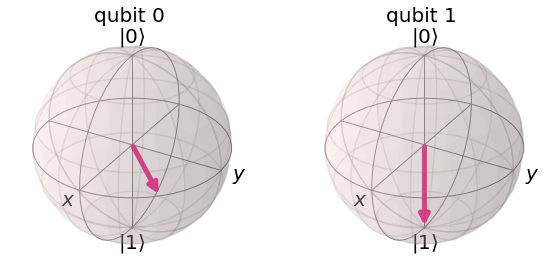

In [4]:
statevector = Statevector(circ)
plot_bloch_multivector(statevector)